# Entrenamiento

Instalamos las dependencias y cargamos las librerías

In [37]:
! pip install tensorflow-gpu==2.4.0
! pip install demoji 
! pip install gensim==4.0.0
! pip install numpy==1.19.0
! pip install transformers
! pip install unidecode

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached numpy-1.19.0-cp37-cp37m-manylinux2010_x86_64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tensorflow-gpu 2.4.0 requires numpy~=1.19.2, but you have numpy 1.19.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


In [2]:
#from google.colab import drive
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from matplotlib.markers import CARETDOWN
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn.preprocessing as pr
import os

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve,roc_auc_score,auc
#from keras.preprocessing import sequence
#from keras.models import Sequential
#from keras.layers import Embedding, LSTM, Dense, Dropout, GRUV2, SimpleRNN,InputLayer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.layers import GRU, GRU,Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional,LSTM,Dropout, SimpleRNN,Embedding, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam

from __future__ import absolute_import

import argparse
import multiprocessing as mp
import logging
import tempfile
import os

import pickle
import gensim
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Embedding,
    LSTM,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
import pickle
import os
import re
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle
#from typing_extensions import ParamSpecKwargs
from textblob import TextBlob, Word
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet') 
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import joblib
import random
import matplotlib.pyplot as plt
import sklearn.preprocessing as pr
from tensorflow import keras 
from  tensorflow.keras.preprocessing.text import Tokenizer
import demoji 
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import unidecode



%matplotlib inline

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
#Conectamos de nuevo con drive para obtener los ficheros
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
cache_dir = "/content/drive/MyDrive/Proyecto_final/"

## Funcines 

Las siguientes funciones nos servirán para hacer leer el dataset y hacer la limpieza de datos.

In [5]:
def read_data(data_dir='dir',file_name = 'data'):
  f = open(data_dir+file_name,'rb')
  data = pd.read_csv(f,sep=',')
  #data = pickle.load(f)
  data = data.loc[data['sentiment_type']!='NEUTRAL']
  data['sentiment']  = 0
  data['sentiment'].loc[data['sentiment_type']=='POSITIVE'] = 1
  data = data[['tweet','sentiment']]
  data = data.rename(columns = {'tweet':'text'} )
  
  return data

In [6]:
def clean_text(text):
    '''Función que remueve caracteres indeseados, stopwords y da formato al texto'''
    contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}
    
    # Se para el texto a minúsculas
    text = text.lower()
    
    # Se da formato y se remueven los caracteres indeseados
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = unidecode.unidecode(text)
    
    # Se reemplazan las contracciones y se eliminan las stopwords
    text = text.split()
    new_text = []
    #for word in text:
     #   if word in contractions and word not in stopwords:
      #      new_text.append(contractions[word])
       # if word not in contractions and word not in stopwords:
        #    new_text.append(word)
   # text = " ".join(new_text)
    #    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        if word not in contractions:
            new_text.append(word)
    text = " ".join(new_text)
    
    
    return text

In [7]:
def clean_emoji(text):
  text=  demoji.replace_with_desc(text," ")
  return text


In [5]:
def clean_text_less3words(text):
    
    
    # Se para el texto a minúsculas
    text = re.sub(r'\b\w{1,3}\b', '', text)
    return text

In [8]:
def clean_numbers(text):
    
    
    # Se para el texto a minúsculas
    text = re.sub(r'[0-9]', '', text)
    return text

In [9]:
def tweet_to_words(text):
    text =re.findall(r"([a-z']+)", text.lower())
    s = TextBlob(' '.join(text))
    return [w.lemmatize() for w in s.words]

In [10]:
def preproces_data(data,cache_dir,balancear = None):


  cache_data = None
  if balancear == 'Si':
    cache_file="data_clean.pkl"

  if cache_file is not None:

    try:
       f = open(cache_dir+cache_file,'rb')
       cache_data = pickle.load(f)
       print("Fichero procesador cargado de la cache")
       

    except:

      pass

  if cache_data is None:

    if balancear is "Si":
          T_max= int((data['sentiment'].loc[ data['sentiment']==0].value_counts().values[0]/0.4)-data['sentiment'].loc[ data['sentiment']==0].value_counts().values[0])
          data_filter = data.loc[ data['sentiment']==1].sample(n=T_max, random_state=42)
          data_filter = pd.concat([data_filter ,data.loc[ data['sentiment']==0]])
          data = shuffle(data_filter)
          data = data.reset_index(drop=True)

    data['text'] = data['text'].apply(lambda x : (clean_emoji(x)))
    data['text'] = data['text'].apply(lambda x : (clean_text(x)))
    data['text'] = data['text'].apply(lambda x : (clean_text_less3words(x)))
    data['text'] = data['text'].apply(lambda x : (clean_numbers(x)))

  if cache_file is not None:

        with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(data, f)
        print("Fichero creado en cache:", cache_file)
  else:

        data = cache_data




  return data

      #data_train, data_test, labels_train, labels_test = train_test_split(data['text'],data['sentiment'],train_size=t_size,test_size=1-t_size,random_state=42,shuffle=True,stratify=data['sentiment'])
      #return data_train, data_test, labels_train, labels_test

In [17]:
cache_file = 'data_clean.pkl'
f = open(cache_dir+cache_file,'rb')
cache_data = pickle.load(f)
data = cache_data


In [33]:
data.head()

text  sentiment
0  guessing vitalik will figure   mcuban  trustle...          0
1  your hourly  update raising hands hourly closi...          1
2  cryptoshieldcat babytrumpeth   heart babytrump...          1
3  mmcrypto like    ethereum will flip bitcoin  f...          1
4  awstian  wouldn  short during  bitcoin markup ...          0

In [18]:
def split_data(data,t_size):   
      
      data_train, data_test, labels_train, labels_test = train_test_split(data['text'],data['sentiment'],train_size=t_size,test_size=1-t_size,random_state=42,shuffle=True,stratify=data['sentiment'])
      return data_train, data_test, labels_train, labels_test

In [11]:
data = read_data(data_dir=cache_dir,file_name = 'BitVader.csv')

NameError: ignored

In [16]:
data = data.reset_index(drop=True)

In [ ]:
data.head()

text  sentiment
0  Blue Ridge Bank shares halted by NYSE after #b...          1
1  ,smiling face with sunglasses, Today, that's t...          1
2  Guys evening, I have read this article about B...          1
3  $BTC A big chance in a billion! Price: \487264...          1
4  This network is secured by 9 508 nodes as of t...          1

Las siguientes funciones generaran la capa de embeding y el tokenizado para usar en el modelo.

In [13]:
def generate_word2vec(train_df):

  # WORD2VEC
    W2V_SIZE = 300
    W2V_WINDOW = 7
# 32
    W2V_EPOCH = 5
    W2V_MIN_COUNT = 10
    SEQUENCE_LENGTH = 300
    documents = [_text.split() for _text in train_df.values]
    w2v_model = gensim.models.word2vec.Word2Vec(
        vector_size=W2V_SIZE,
        window=W2V_WINDOW,
        min_count=W2V_MIN_COUNT,
        workers=mp.cpu_count(),
    )
    w2v_model.build_vocab(documents)

    words = w2v_model.wv.index_to_key
    vocab_size = len(words)
    logging.info(f"Vocab size: {vocab_size}")
    w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

    return w2v_model


def generate_tokenizer(train_df):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_df)
    vocab_size = len(tokenizer.word_index) + 1
    logging.info(f"Total words: {vocab_size}")
    return tokenizer, vocab_size

def generate_embedding(word2vec_model, vocab_size, tokenizer):
    W2V_SIZE = 300
    SEQUENCE_LENGTH = 300
    embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH,
        trainable=False,
    )

Las siguientes funciones son para evaluar el modelo.

In [14]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [15]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

In [16]:
def evaluation_model(model,train_X,test_X,label_test):
  
  #train_predict = model.predict(train_X)
  test_predict = model.predict(test_X)
  #prediction_labels_train=np.array(list(map(lambda x: 1 if x >0.5 else 0,train_predict)))
  prediction_labels_test=np.array(list(map(lambda x: 1 if x >0.5 else 0,test_predict)))

  print('Confussion matrix:\n{}'.format(confusion_matrix(labels_test, prediction_labels_test)))
  print('\nClassification report:\n{}'.format(classification_report(labels_test, prediction_labels_test)))
  print('Accuracy score:{}'.format(accuracy_score(labels_test, prediction_labels_test)))
  plot_confusion_matrix(confusion_matrix(labels_test, prediction_labels_test))
  calcula_metricas(confusion_matrix(labels_test, prediction_labels_test))

In [29]:
def ROC_c (X_test,y_test,model,name_model):
  y_pred_keras = model.predict(X_test).ravel()
  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
  auc_keras = auc(fpr_keras, tpr_keras)
  plt.figure()
  plt.plot(fpr_keras, tpr_keras, label=name_model +' (area = {:.3f})'.format(auc_keras))
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

## Preporcesado

In [22]:
data= preproces_data(data,cache_dir,balancear = 'Si') 

Fichero procesador cargado de la cache
Fichero creado en cache: data_clean.pkl


### División train y test

In [19]:
train_df, test_df, labels_train, labels_test = split_data(data,0.75)

### word2vec

In [20]:
word2vec_model = generate_word2vec(train_df)

### Tokenizado

In [21]:
tokenizer, vocab_size = generate_tokenizer(train_df)

In [26]:
vocab_size

287375

In [27]:
with open(os.path.join(cache_dir, 'tokenizer.pkl'), "wb") as f:
                pickle.dump(tokenizer, f)

## Regresión logística

### Selección de características

In [27]:
words_train = list(map(tweet_to_words, train_df))
words_test = list(map(tweet_to_words, test_df))

In [28]:
vectorizer = CountVectorizer(max_features=1000,min_df = 1,max_df = 1.0,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  


In [29]:
features_train = pr.normalize(vectorizer.fit_transform(words_train).toarray(),axis=1)


In [30]:
features_test = pr.normalize(vectorizer.transform(words_test).toarray(),axis = 1)

### Hiperparámetros

In [31]:
c_params = [ 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=2000,verbose=2)
    lr.fit(features_train, labels_train)
    
    train_predict = lr.predict(features_train)
    test_predict = lr.predict(features_test)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(labels_test, test_predict)))
    
    train_acc.append(accuracy_score(labels_train, train_predict))
    test_acc.append(accuracy_score(labels_test, test_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.2min finished


Accuracy for C=0.5: 0.8894975855829949


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min finished


Accuracy for C=1: 0.8898498628035995


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.3min finished


Accuracy for C=10: 0.8904226128425416


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.8min finished


Accuracy for C=100: 0.8904417843919623


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.2min finished


Accuracy for C=1000: 0.8904393879482847


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.4min finished


Accuracy for C=10000: 0.890432198617252


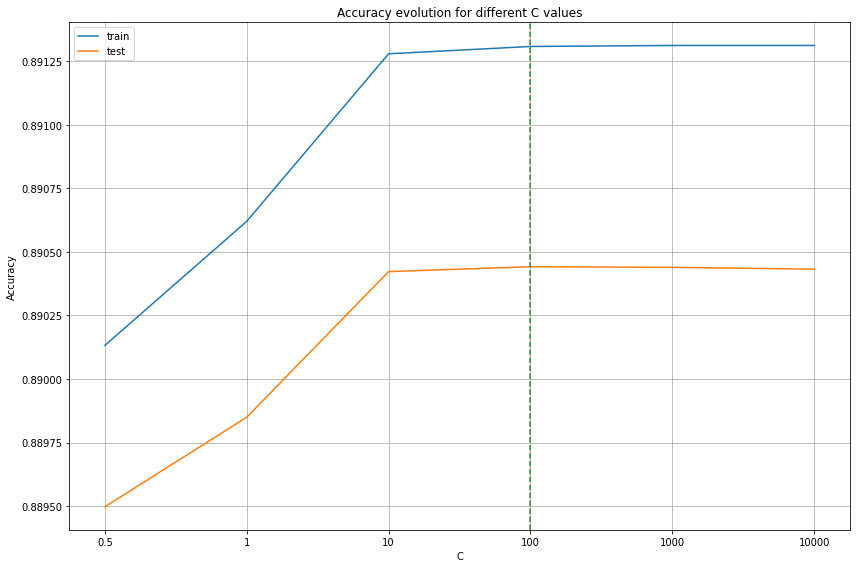

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

### Modelo

In [33]:
#C=10
lr = LogisticRegression(C=10, solver='lbfgs', max_iter=2000,verbose=2)
lr.fit(features_train, labels_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.3min finished


LogisticRegression(C=10, max_iter=2000, verbose=2)

Confussion matrix:
[[ 60193  29712]
 [ 16013 311367]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.72     89905
           1       0.91      0.95      0.93    327380

    accuracy                           0.89    417285
   macro avg       0.85      0.81      0.83    417285
weighted avg       0.89      0.89      0.89    417285

Accuracy score:0.8904226128425416


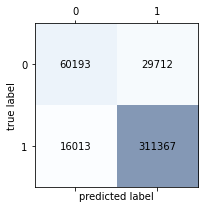

ACC:  0.8904226128425416
SEN:  0.9510874213452257
ESP:  0.6695178243701685
PPV:  0.91288821651289
FSC:  0.9315964030703454


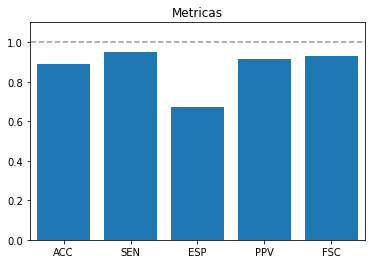

In [34]:
evaluation_model(lr,features_train,features_test,labels_test)

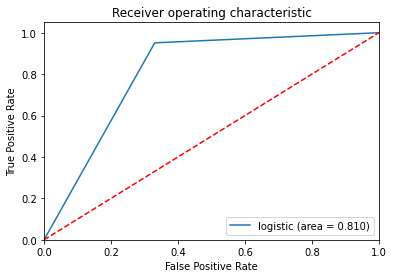

In [36]:
ROC_c (features_test,labels_test,lr,'logistic')

In [35]:
# Guardamos el modelo:

filename = 'logistic.plk'
pickle.dump(lr, open(cache_dir+filename, 'wb'))

## Redes Neuronales

In [23]:
SEQUENCE_LENGTH = 300
x_train = pad_sequences(
        tokenizer.texts_to_sequences(train_df), maxlen=SEQUENCE_LENGTH
    )
x_test = pad_sequences(
        tokenizer.texts_to_sequences(test_df), maxlen=SEQUENCE_LENGTH
    )

In [24]:
y_train = labels_train
y_train = y_train.values.reshape(-1, 1)
embedding_layer = generate_embedding(word2vec_model, vocab_size, tokenizer)


### 1. Modelo 1

  - embedding_layer
  - dropout
  - Lstm(100,con drop out(0.2)
  - FC


In [31]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(Dropout(0.5))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          86212500  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 86,373,001
Trainable params: 160,501
Non-trainable params: 86,212,500
_________________________________________________________________


In [32]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]
model1.fit(
        x_train,
        y_train,
        batch_size=64,
        steps_per_epoch=1000,
        epochs=5,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks,
    )


Epoch 1/5
1000/1000 [==============================] - 1073s 1s/step - loss: 0.4857 - accuracy: 0.7513 - val_loss: 0.3039 - val_accuracy: 0.8693
Epoch 2/5
1000/1000 [==============================] - 1062s 1s/step - loss: 0.3440 - accuracy: 0.8445 - val_loss: 0.2659 - val_accuracy: 0.8866
Epoch 3/5
1000/1000 [==============================] - 1081s 1s/step - loss: 0.3189 - accuracy: 0.8555 - val_loss: 0.2588 - val_accuracy: 0.8875
Epoch 4/5
1000/1000 [==============================] - 1075s 1s/step - loss: 0.3032 - accuracy: 0.8652 - val_loss: 0.2519 - val_accuracy: 0.8911
Epoch 5/5
1000/1000 [==============================] - 1061s 1s/step - loss: 0.2924 - accuracy: 0.8700 - val_loss: 0.2339 - val_accuracy: 0.9020


In [ ]:
filename = "lstm1.h5"  # HDF5 file
model1.save(os.path.join(cache_dir, filename))

In [ ]:
#model1 = load_model(os.path.join(cache_dir, 'lstm1.h5'))

Confussion matrix:
[[ 82669   7236]
 [ 16216 118641]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     89905
           1       0.94      0.88      0.91    134857

    accuracy                           0.90    224762
   macro avg       0.89      0.90      0.89    224762
weighted avg       0.90      0.90      0.90    224762

Accuracy score:0.8956585187887632


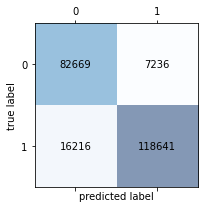

ACC:  0.8956585187887632
SEN:  0.8797541099090147
ESP:  0.9195150436571937
PPV:  0.9425153125670297
FSC:  0.9100539246895304


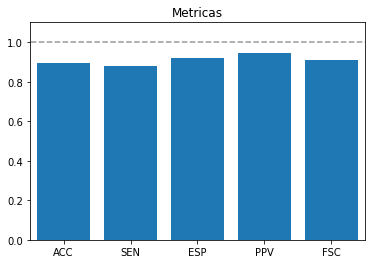

In [ ]:
evaluation_model(model1,x_train,x_test,labels_test)

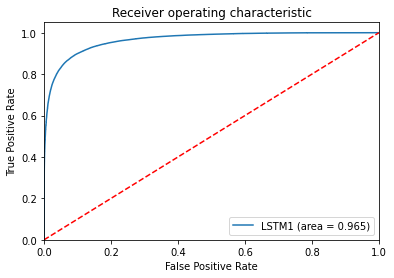

In [ ]:
ROC_c (x_test,labels_test,model1,'LSTM1')

### 2. Modelo 2
  - dejamos que genere la capa de embeding
  - convolucional
  - maxpol
  - LSTM bidireccional
  - drop out
  - FC


In [ ]:
max = 0
mean = []
for s in train_df:
  length = len(s)
  mean.append(len(s))
  if length > max:
    max = length

In [ ]:
embedding_size = 300
max_len = 300

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model2.add(Conv1D(filters=64, kernel_size=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Bidirectional(LSTM(100)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 300)          86154300  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 300, 64)           19264     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 150, 64)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               132000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 86,305,765
Trainable params: 86,305,765
Non-trainable params: 0
__________________________________________

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]
model2.fit(
        x_train,
        y_train,
        batch_size=64,
        steps_per_epoch=1000,
        epochs=5,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks)


Epoch 1/5
1000/1000 [==============================] - 501s 498ms/step - loss: 0.3511 - accuracy: 0.8313 - val_loss: 0.1853 - val_accuracy: 0.9265
Epoch 2/5
1000/1000 [==============================] - 518s 518ms/step - loss: 0.1731 - accuracy: 0.9350 - val_loss: 0.1512 - val_accuracy: 0.9403
Epoch 3/5
1000/1000 [==============================] - 498s 498ms/step - loss: 0.1447 - accuracy: 0.9446 - val_loss: 0.1386 - val_accuracy: 0.9464
Epoch 4/5
1000/1000 [==============================] - 502s 502ms/step - loss: 0.1414 - accuracy: 0.9456 - val_loss: 0.1350 - val_accuracy: 0.9473
Epoch 5/5
1000/1000 [==============================] - 500s 500ms/step - loss: 0.1327 - accuracy: 0.9507 - val_loss: 0.1321 - val_accuracy: 0.9505


In [ ]:
filename = "bilstm1.h5"  # HDF5 file
model2.save(os.path.join(cache_dir, filename))

Confussion matrix:
[[ 83494   6411]
 [  4524 130333]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     89905
           1       0.95      0.97      0.96    134857

    accuracy                           0.95    224762
   macro avg       0.95      0.95      0.95    224762
weighted avg       0.95      0.95      0.95    224762

Accuracy score:0.951348537564179


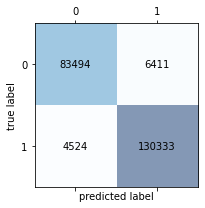

ACC:  0.951348537564179
SEN:  0.9664533542938075
ESP:  0.928691396474056
PPV:  0.9531167729479904
FSC:  0.9597387343934669


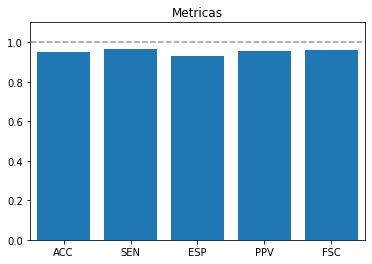

In [ ]:
evaluation_model(model2,x_train,x_test,labels_test)

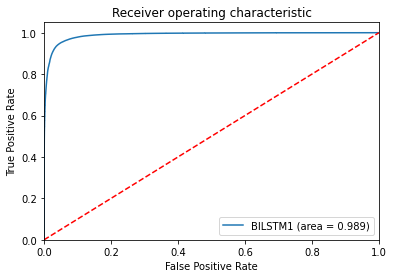

In [ ]:
ROC_c (x_test,labels_test,model2,'BILSTM1')

### 3. Modelo 3
  - dejamos que genere la capa de embeding
  - GRU bidireccional
  - drop out
  - FC


In [ ]:
embedding_size = 32

model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model3.add(Bidirectional(GRU(100)))
model3.add( Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 300, 32)           9189792   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 200)               80400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 9,270,393
Trainable params: 9,270,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]
model3.fit(
        x_train,
        y_train,
        batch_size=64,
        steps_per_epoch=1000,
        epochs=5,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks)


Epoch 1/5
1000/1000 [==============================] - 88s 85ms/step - loss: 0.4392 - accuracy: 0.7801 - val_loss: 0.2091 - val_accuracy: 0.9175
Epoch 2/5
1000/1000 [==============================] - 84s 84ms/step - loss: 0.2009 - accuracy: 0.9211 - val_loss: 0.1731 - val_accuracy: 0.9348
Epoch 3/5
1000/1000 [==============================] - 84s 84ms/step - loss: 0.1593 - accuracy: 0.9408 - val_loss: 0.1550 - val_accuracy: 0.9426
Epoch 4/5
1000/1000 [==============================] - 84s 84ms/step - loss: 0.1472 - accuracy: 0.9465 - val_loss: 0.1391 - val_accuracy: 0.9467
Epoch 5/5
1000/1000 [==============================] - 83s 83ms/step - loss: 0.1304 - accuracy: 0.9521 - val_loss: 0.1255 - val_accuracy: 0.9524


In [ ]:
filename = "bigru1.h5"  # HDF5 file
model3.save(os.path.join(cache_dir, filename))

Confussion matrix:
[[ 83741   6164]
 [  4496 130361]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     89905
           1       0.95      0.97      0.96    134857

    accuracy                           0.95    224762
   macro avg       0.95      0.95      0.95    224762
weighted avg       0.95      0.95      0.95    224762

Accuracy score:0.9525720539948924


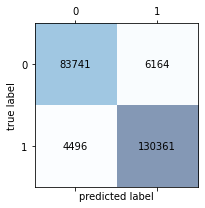

ACC:  0.9525720539948924
SEN:  0.9666609816323958
ESP:  0.931438740893165
PPV:  0.954850759934078
FSC:  0.960719576095688


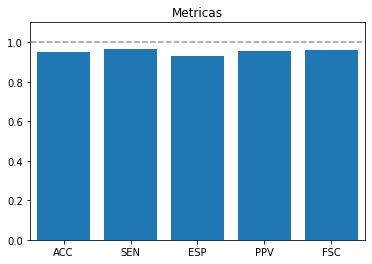

In [ ]:
evaluation_model(model3,x_train,x_test,labels_test)

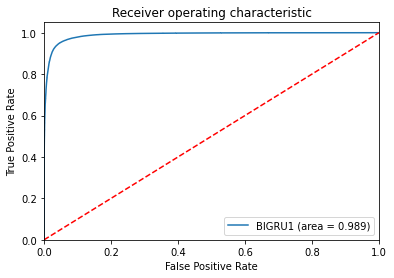

In [ ]:
ROC_c (x_test,labels_test,model3,'BIGRU1')

### 4. Modelo 4
  - dejamos que genere la capa de embeding
  - LSTM bidireccional
  - drop out
  - FC(50)
  - FC


In [ ]:
embedding_size = 32

model4 = Sequential()
model4.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model4.add(Bidirectional(LSTM(100)))
model4.add( Dropout(0.2))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 32)           9189792   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 200)               106400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 9,306,293
Trainable params: 9,306,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]
model4.fit(
        x_train,
        y_train,
        batch_size=64,
        steps_per_epoch=1000,
        epochs=5,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks)


Epoch 1/5
1000/1000 [==============================] - 91s 89ms/step - loss: 0.3873 - accuracy: 0.8096 - val_loss: 0.2239 - val_accuracy: 0.9132
Epoch 2/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.1947 - accuracy: 0.9247 - val_loss: 0.1769 - val_accuracy: 0.9323
Epoch 3/5
1000/1000 [==============================] - 87s 88ms/step - loss: 0.1698 - accuracy: 0.9356 - val_loss: 0.1588 - val_accuracy: 0.9413
Epoch 4/5
1000/1000 [==============================] - 87s 87ms/step - loss: 0.1432 - accuracy: 0.9458 - val_loss: 0.1344 - val_accuracy: 0.9474
Epoch 5/5
1000/1000 [==============================] - 87s 87ms/step - loss: 0.1298 - accuracy: 0.9525 - val_loss: 0.1213 - val_accuracy: 0.9540


In [ ]:
filename = "biLSTM2.h5"  # HDF5 file
model4.save(os.path.join(cache_dir, filename))

Confussion matrix:
[[ 85772   4133]
 [  5938 128919]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     89905
           1       0.97      0.96      0.96    134857

    accuracy                           0.96    224762
   macro avg       0.95      0.95      0.95    224762
weighted avg       0.96      0.96      0.96    224762

Accuracy score:0.9551926037319476


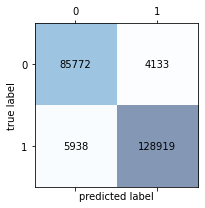

ACC:  0.9551926037319476
SEN:  0.9559681736950992
ESP:  0.9540292531004949
PPV:  0.9689369569792262
FSC:  0.9624088776412887


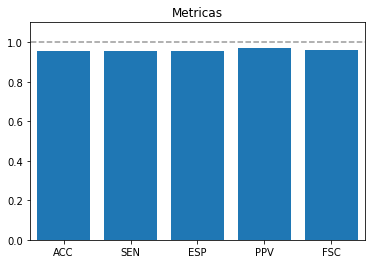

In [ ]:
evaluation_model(model4,x_train,x_test,labels_test)

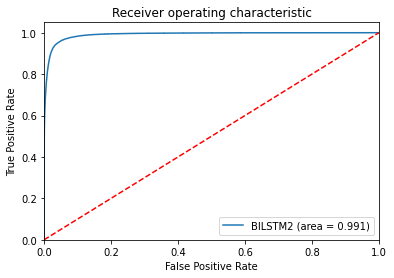

In [ ]:
ROC_c (x_test,labels_test,model4,'BILSTM2')

### 5. Modelo 5
  - dejamos que genere la capa de embeding
  - GRU bidireccional
  - drop out
  - FC(50)
  - FC


In [ ]:
embedding_size = 32

model5 = Sequential()
model5.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model5.add(Bidirectional(GRU(100)))
model5.add( Dropout(0.2))
model5.add(Dense(50, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 300, 32)           9189792   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 200)               80400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 9,280,293
Trainable params: 9,280,293
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]
model5.fit(
        x_train,
        y_train,
        batch_size=64,
        steps_per_epoch=1000,
        epochs=5,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks)


Epoch 1/5
1000/1000 [==============================] - 83s 83ms/step - loss: 0.1375 - accuracy: 0.9477 - val_loss: 0.1454 - val_accuracy: 0.9429
Epoch 2/5
1000/1000 [==============================] - 83s 83ms/step - loss: 0.1287 - accuracy: 0.9523 - val_loss: 0.1397 - val_accuracy: 0.9451
Epoch 3/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.1247 - accuracy: 0.9531 - val_loss: 0.1241 - val_accuracy: 0.9530
Epoch 4/5
1000/1000 [==============================] - 84s 84ms/step - loss: 0.1151 - accuracy: 0.9577 - val_loss: 0.1260 - val_accuracy: 0.9520
Epoch 5/5
1000/1000 [==============================] - 86s 86ms/step - loss: 0.1105 - accuracy: 0.9588 - val_loss: 0.1161 - val_accuracy: 0.9571


In [ ]:
filename = "biGRU2.h5"  # HDF5 file
model5.save(os.path.join(cache_dir, filename))

Confussion matrix:
[[ 84976   4929]
 [  4686 130171]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     89905
           1       0.96      0.97      0.96    134857

    accuracy                           0.96    224762
   macro avg       0.96      0.96      0.96    224762
weighted avg       0.96      0.96      0.96    224762

Accuracy score:0.9572214164316032


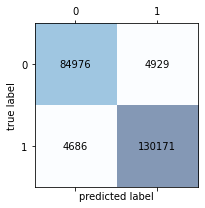

ACC:  0.9572214164316032
SEN:  0.9652520818348325
ESP:  0.9451754629887104
PPV:  0.9635159141376758
FSC:  0.9643832165863453


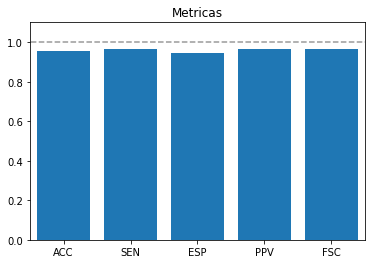

In [ ]:
evaluation_model(model5,x_train,x_test,labels_test)

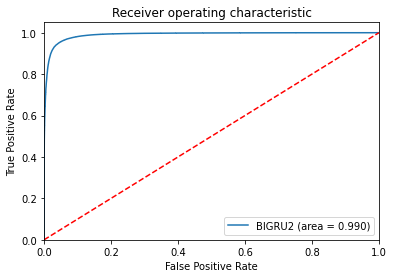

In [30]:
ROC_c (x_test,labels_test,model5,'BIGRU2')

# Conclusiones

El modelo elegido, es un modelo de redes recurrentes del tipo GRU bidireccional, que incluye dos capas densas, una de 50 neuronas y la capa de salida, además se incluye dropout para controlar overfitting (modelo 5).

Se han llevado a cabo un conjunto de métricas para evaluar el modelo, así como la curva ROC.

Se puede ver como el modelo funciona bastante bien, ya que para todas las métricas obtenemos unos resultados por encima del 80%, e incluso en alguna de ellas está cerca del 90%.
Las métricas usadas para la evaluación son las siguientes:
- ACC: Es el accuracy, nos mide la tasa de acierto ( 96%)
- SEN: Es la precisión, nos da un indicador de la calidad (97%)
- ESP: Especifidad, porcentaje de casos negativos detectados (95%)
- PPV: recall, exhaustividad, la cantidad que el modelo es capaz de identificar, porcentaje de casos positivos detectados. (96%)
- FSC: F1, combina las medidas de precisión y recall en un sólo valor (96%)

La curva ROC es una representación gráfica que ilustra la relación entre la sensibilidad y la especificidad para diferentes puntos de corte en un clasificador. No da información de si el modelo es bueno o no distinguiendo dos cosas, en este casos reviews positivas y negativas. En este caso, el área bajo la curva es de 0.99, y esto nos dice que hay 99% de probabilidad de que el modelo pueda distinguir entre reviews positivas y negativas.

El dataset se compone de tweets menciando el bitcoin durante un periodo de tiempo determinado. Tal y como se observo en el análisis exploratorio, el dataset estaba bastante desbalanceado, y se componía de 3 clases ( POSITIVOS, NEGATIVOS Y NEUTRAL).

El estudio consiste en obtener una probabilidad que nos permita asginar un sentimiento acerca de un determinado tweet. Por ese motivo el objetivo no es un problema multiclase si no de clasificación binaria. Por ese motivo, prescindimos de los tweets neutrales por el momento, y además se balancea el dataset ( 60% positivas, 40% negativas)

El modelo seleccionado es una red neuronal del tipo GRUbidireccional, con 100 neuronas en esa capa. Incluye además dropout para controlar el overfitting.
Inlcuse una capa densa de 50 neuronas con activación relu,y
la capa de salida es una densa con sigmoide como activación.
El número de épocas ha sido solo de 5.

Hemos visto, como la regresión logística obtenida resultados bastante buenos, pero se quedaba por debajo de cualquier modelo de NLP probado.


El modelo seleccionado tiene una accuracy del 96% y el area de la curva ROC es del 99%.
